<a href="https://colab.research.google.com/github/rim-yu/SGU_ANT6320_Assignment/blob/master/Exercise04_planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-label prediction with Planet Amazon dataset

In [0]:
%reload_ext autoreload
%autoreload 2
# reload automatically.
%matplotlib inline
# Ipython에서 제공하는 Rich output에 대한 표현 방식.
# figure, sound, animation과 같은 결과물들을 Rich output이라고 한다. 
# notebook을 실행한 browser에서 바로 Rich output을 볼 수 있게 해주는 command. 

In [0]:
from fastai.vision import * 
# fastai.basics의 모든 module을 import한다.

## Getting the data

The planet dataset isn't available on the [fastai dataset page](https://course.fast.ai/datasets) due to copyright restrictions. You can download it from Kaggle however. Let's see how to do this by using the [Kaggle API](https://github.com/Kaggle/kaggle-api) as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal (depending on your platform you may need to modify this slightly to either add `source activate fastai` or similar, or prefix `pip` with a path. Have a look at how `conda install` is called for your platform in the appropriate *Returning to work* section of https://course.fast.ai/. (Depending on your environment, you may also need to append "--user" to the command.)

In [0]:
! {sys.executable} -m pip install kaggle --upgrade
# upgrade version의 kaggle을 설치한다. 

Then you need to upload your credentials from Kaggle on your instance. Login to kaggle and click on your profile picture on the top left corner, then 'My account'. Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands (or run them in a terminal). For Windows, uncomment the last two commands.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# ! mkdir -p ~/.kaggle/
# ! mv kaggle.json ~/.kaggle/

# For Windows, uncomment these two commands
# ! mkdir %userprofile%\.kaggle
# ! move kaggle.json %userprofile%\.kaggle
# .kaggle folder을 생성한 뒤, kaggle.json file을 .kaggle folder에 위치시킨다. 

! mkdir /root/\.kaggle 
# /root/\.kaggle 경로로 '.kaggle' folder를 만든다. 
! cp /content/drive/"My Drive"/kaggle.json /root/\.kaggle
# upload한 kaggle.json file을 '.kaggle' floder로 이동시킨다.(사실 복사한다. 겨우 구글 드라이브 다운 받은 거 mv해서 날리지 않기.) 

You're all set to download the data from [planet competition](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space). You **first need to go to its main page and accept its rules**, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a `403 forbidden` error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on *Rules* tab, and then scroll to the bottom to find the *accept* button).

In [5]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path
# planet folder가 있는 경로를 보여준다.
# /root/.fastai/data/planet 경로로 folder가 생성된다.  

PosixPath('/root/.fastai/data/planet')

In [0]:
! chmod 600 /root/.kaggle/kaggle.json 
# Waring : Your Kaggle API key is readable by other users on this system.
# 보안을 위해 하는듯.

In [0]:
# ! cp /content/drive/"My Drive"/planet/train_v2.csv.zip /root/.fastai/data/planet # 구글 드라이브로 받은 train_v2.csv.zip 파일을 /root 경로로 옮긴다. 
! cp /content/drive/"My Drive"/train_v2.csv.zip /root/.fastai/data/planet
! unzip -q -n {path}/train_v2.csv.zip -d {path} # train_v2.csv.zip 파일을 unzip. 

In [0]:
""" 중간 점검
! cd /root/.fastai/data/planet
! ls
/root/.fastai/data/planet 경로에 train-jpg.tar  train_v2.csv  train_v2.csv.zip 파일들이 있음. 
train-jpg.tar 잘못 다운로드, 다시 삭제할 거임. ! rm train-jpg.tar
mv 말고 cp의 중요성을 다시 한번 인지.
"""

In [0]:
! cp /content/drive/"My Drive"/train-jpg.tar.7z /root/.fastai/data/planet # train-jpg.tar.7z를 /root 경로로 옮긴다. 
! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path.as_posix()} # 7z 파일 푸는듯. 

In [0]:
# 이거 안씀. (구글 마운트함.)
# ! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
# ! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}
# planet folder 아래에 train-jpg.tar.7z file과 train_v2.csv file을 download한다.  
# ! unzip -q -n {path}/train_v2.csv.zip -d {path}
# train_v2.csv file을 unzip한다. 

404 - Not Found
404 - Not Found
unzip:  cannot find or open /root/.fastai/data/planet/train_v2.csv.zip, /root/.fastai/data/planet/train_v2.csv.zip.zip or /root/.fastai/data/planet/train_v2.csv.zip.ZIP.


To extract the content of this file, we'll need 7zip, so uncomment the following line if you need to install it (or run `sudo apt install p7zip-full` in your terminal).

In [0]:
! conda install --yes --prefix {sys.prefix} -c haasad eidl7zip
# download한 file에서 content를 추출하기 위해 7zip이 필요. 7zip을 설치하는 code.
# 허나 필요 없었음. 

And now we can unpack the data (uncomment to run - this might take a few minutes to complete).

In [0]:
# ! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path.as_posix()}
# train-jpg.tar.7z file을 unzip한다. 
# 위에서 씀. 

## Multiclassification

Contrary to the pets dataset studied in last lesson, here each picture can have multiple labels. If we take a look at the csv file containing the labels (in 'train_v2.csv' here) we see that each 'image_name' is associated to several tags separated by spaces.

In [17]:
df = pd.read_csv(path/'train_v2.csv') 
df.head()
# train_v2.csv file을 읽어 첫 5개의 행을 보여준다. 

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
# If you want to quickly get a set of random transforms that have worked well in a wide range of tasks, you should use the get_transforms function. 
# flip vert : If True, the image can be flipped vertically or rotated by 90 degrees.
# lighting: 밝기, zoom : 줌, warp : 휘는 정도.? tfms : image transformer
# get_transfroms()에 대한 링크 : https://docs.fast.ai/vision.transform.html

We use parentheses around the data block pipeline below, so that we can use a multiline statement without needing to add '\\'.

In [0]:
np.random.seed(42)
# 난수 발생
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))
# ImageList.from_csv() : Create an ItemList in path from the inputs in the cols of path/csv_name. suffix는 접미사임.
# split_by_rand_pct(valid_pct = 0.2) : Split the items randomly by putting valid_pct in the validation set, optional seed can be passed.
# label_from_df() : Label self.items from the values in cols in self.inner_df.
# label_delim=' ' : A delimiter is used to determine what the rows and columns should be set by.
# src는 source의 약자임.?

In [38]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))
# src를 통해 image를 가져와서 data에 저장한다. 
# databunch() is actually going to create the the DataLoader and the DataBunch in one go.
# A DataBunch is a collection of PyTorch DataLoaders returned when you call the databunch function. 
# It also defines how they are created from your training, validation, and optionally test LabelList instances.

""" dataloader & databunch에 대한 의문점
수백만개 이상의 데이터가 쌓인 상태에서는 모든 데이터를 한번에 넣어서 처리할 수가 없음. 
그래서 전체 데이터를 나눠 일부를 묶음 batch라는 단위를 만들어서 데이터를 나눠서 처리를 하는 것임.
batch를 이용할 때 epoch, batch_size, iterations(data size = batch_size*iterations) 등의 용어를 씀.
이걸 구현하려면 과정이 번거로움. 만약 파이토치에서 제공해주는 DataLoader을 쓴다면 그럴 필요가 없음.
DataLoader로부터 batch_size만큼 데이터를 받아오면 된다.
""" 

""" data가 다소 공식화되어있었음.
    data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder() -> 여기까지 src로 저장. 
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))
It's set up with an imagenet structure so we use it to load our training and validation datasets, 
then label, transform, convert them into ImageDataBunch and finally, normalize them. 
"""

" data = (ImageList.from_folder(mnist)\n        .split_by_folder()          \n        .label_from_folder() -> 여기까지 src로 저장. \n        .transform(tfms, size=32)\n        .databunch()\n        .normalize(imagenet_stats))\nIt's set up with an imagenet structure so we use it to load our training and validation datasets, \nthen label, transform, convert them into ImageDataBunch and finally, normalize them. "

`show_batch` still works, and show us the different labels separated by `;`.

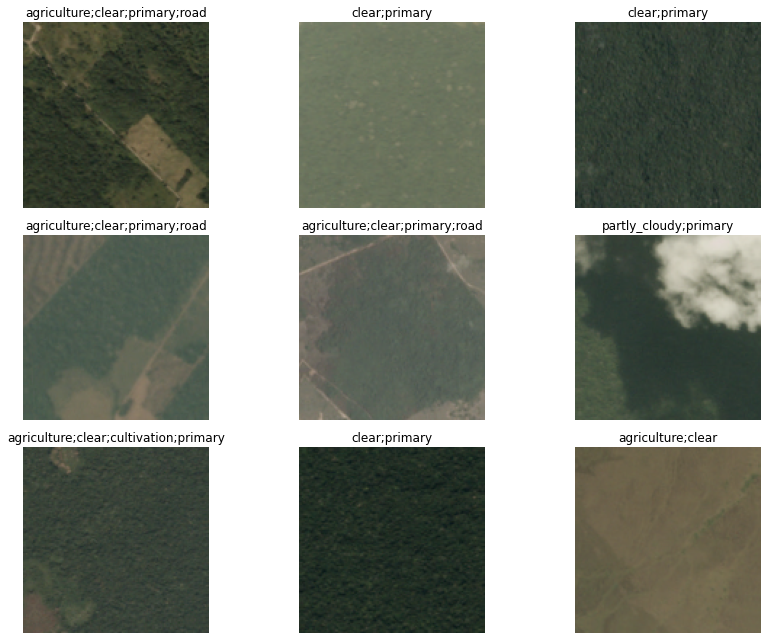

In [21]:
data.show_batch(rows=3, figsize=(12,9))
# image로 이루어진 data를 보여준다. 3*3 행렬. 

To create a `Learner` we use the same function as in lesson 1. Our base architecture is resnet50 again, but the metrics are a little bit differeent: we use `accuracy_thresh` instead of `accuracy`. In lesson 1, we determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. `accuracy_thresh` selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.

As for Fbeta, it's the metric that was used by Kaggle on this competition. See [here](https://en.wikipedia.org/wiki/F1_score) for more details.

In [0]:
arch = models.resnet50 
# ResNet50 model을 이용한다. 
# arch는 architecture의 약자임. 

In [23]:
acc_02 = partial(accuracy_thresh, thresh=0.2) # 일종의 accuracy를 구한 것임.(1)
""" what is partial function.?
https://docs.python.org/2/library/functools.html
"""

""" accuracy_thresh : Computes accuracy when y_pred and y_true are the same size. 
Normal accuracy function use arg_max which mean that it will select the highest probability. 
If we want to use accuracy and feed in threshold we need to use accuracy_thresh(thresh=0.2)
Because we can't define every time threshold we need to somehow create our own version of accuracy where the threshold is always 0.2.
"""

f_score = partial(fbeta, thresh=0.2) # 일종의 accuracy를 구한 것임.(2)
""" what is fbeta.?
F1 Score는 Precision과 Recall의 조화평균 값이다. : https://blog.naver.com/wideeyed/221531998840
그럼 Precision과 Recall은 뭐냐.? : https://blog.naver.com/wideeyed/221531940245
"""

learn = cnn_learner(data, arch, metrics=[acc_02, f_score])
# learner을 생성한다. metrics=[accuracy]인데 [acc_02, f_score] 2개를 구하는 것임. 

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


We use the LR Finder to pick a good learning rate.

In [24]:
learn.lr_find()
# learning rate을 찾는다. 

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


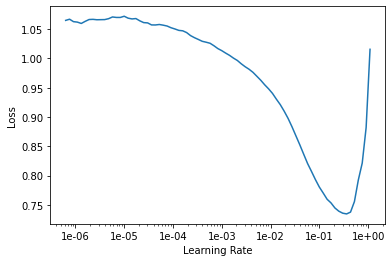

In [25]:
learn.recorder.plot()
# lr과 loss의 관계를 나타낸다. 

Then we can fit the head of our network.

In [0]:
lr = 0.01 
# 0.01 = 10^-2 = 1e-02 제발 기억 좀 하자..

In [27]:
learn.fit_one_cycle(5, slice(lr)) 
# 5 epochs 동안 학습을 하는데 slice(lr)이 무슨 의미인지 모르겠다. 왜 구간이 아닌지.?
# 사실 fit_one_cycle()에서 slice(lr)이 당근 lr인 줄 알았는데 아닌 것 같음.
# (1) slice()은 무엇인가, (2) fit_one_cycle에서 slice(lr)은 어떤 역할을 하는가를 알아보아야 함.

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.140054,0.118020,0.948247,0.897148,02:23
1,0.110894,0.099672,0.945384,0.913898,02:23
2,0.103614,0.094720,0.953159,0.917783,02:25
3,0.095635,0.088819,0.954482,0.923370,02:25
4,0.091493,0.087549,0.956749,0.925139,02:24


In [0]:
learn.save('stage-1-rn50')
# learner을 저장한다. 

...And fine-tune the whole model:

In [0]:
learn.unfreeze() 
# 잠긴 layer을 풀어준다. 

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


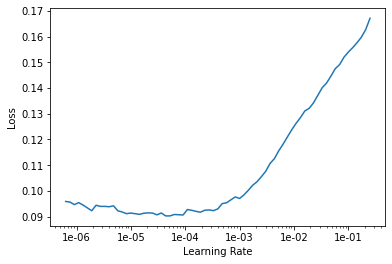

In [30]:
learn.lr_find() 
learn.recorder.plot()
# lr을 찾아 loss와 lr의 관계를 나타낸다. 

In [31]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))
# slice(1e-05, 1e-03(0.002 언저리)) = slice(0.00001, 0.002).
# train_loss가 slice(lr)일 적보다 눈에 띄게 감소하였음. 

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.097449,0.093841,0.954649,0.916679,02:34
1,0.095523,0.088006,0.956008,0.924933,02:31
2,0.090929,0.086391,0.955899,0.927068,02:29
3,0.086361,0.083562,0.958057,0.928963,02:28
4,0.079955,0.083148,0.958435,0.928295,02:29


In [0]:
learn.save('stage-2-rn50')
# learner을 저장한다. 

In [33]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))
# data size 키움. 새로운 data 탄생. 

learn.data = data 
# cnn_learner()에서 data가 들어감. data가 learn.data였나부다.
# 새로 만든 data를 learn.data에 넣어주었음.  
data.train_ds[0][0].shape 
# data 중 train datasets에서 0행 0열, 즉 첫 번째 data의 shape을 뽑아낸다. 
# 3(RGB임.?), 256, 256(위에서 size=256 설정하였음.)

torch.Size([3, 256, 256])

In [0]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


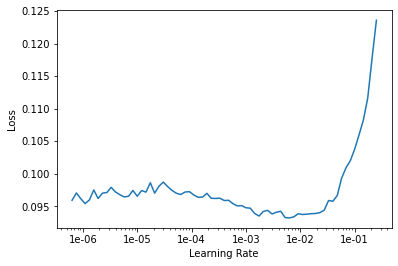

In [35]:
learn.lr_find()
learn.recorder.plot()
# lr을 찾아 loss와 lr의 관계를 나타낸다.

In [0]:
lr=1e-2/2
# lr을 (1e-2)/2(헷갈림주의)=0.01/2=0.005=1e-03과 1e-02 사이에 있는 값으로 설정한다. 

In [37]:
learn.fit_one_cycle(5, slice(lr))
# 위에랑 거의 비슷해보이는데 이걸 왜 하는 건가.?
# data size 256이나 128이나 별 차이 없다는 걸 보여주는 건가.?

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.083261,0.086058,0.958863,0.925201,04:40
1,0.087414,0.086599,0.960317,0.922136,04:37
2,0.087451,0.082833,0.955812,0.929630,04:33
3,0.084648,0.081076,0.959081,0.931253,04:29
4,0.079696,0.081332,0.959430,0.930406,04:27


In [0]:
learn.save('stage-1-256-rn50')
# learner을 저장한다. 

In [0]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))
# slice(1e-5, 1e-3=0.001=lr/5)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.081950,0.084199,0.956015,0.926512,02:33
1,0.085265,0.085887,0.955216,0.925623,02:32
2,0.081898,0.084573,0.958202,0.927046,02:30
3,0.078087,0.084118,0.960201,0.929138,02:28
4,0.073525,0.083077,0.958849,0.929095,02:28


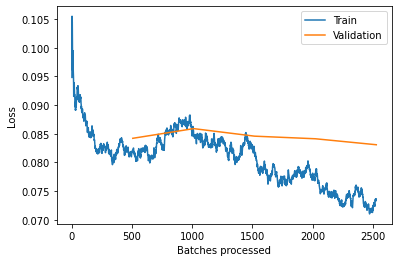

In [42]:
learn.recorder.plot_losses()
# train_loss와 valid_loss의 변화를 보여준다. 

In [0]:
learn.save('stage-2-256-rn50')
# learner을 저장한다. 

You won't really know how you're going until you submit to Kaggle, since the leaderboard isn't using the same subset as we have for training. But as a guide, 50th place (out of 938 teams) on the private leaderboard was a score of `0.930`.

In [0]:
learn.export()
# Once everything is ready for inference, we just have to call learn.export to save all the information of our Learner object for inference

## fin

(This section will be covered in part 2 - please don't ask about it just yet! :) )

In [0]:
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg.tar.7z | tar xf - -C {path}
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg-additional.tar.7z | tar xf - -C {path}

In [0]:
test = ImageList.from_folder(path/'test-jpg').add(ImageList.from_folder(path/'test-jpg-additional'))
len(test)

61191

In [0]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [0]:
labelled_preds[:5]

['agriculture cultivation partly_cloudy primary road',
 'clear haze primary water',
 'agriculture clear cultivation primary',
 'clear primary',
 'partly_cloudy primary']

In [0]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [0]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [0]:
df.to_csv(path/'submission.csv', index=False)

In [0]:
! kaggle competitions submit planet-understanding-the-amazon-from-space -f {path/'submission.csv'} -m "My submission"

100%|██████████████████████████████████████| 2.18M/2.18M [00:02<00:00, 1.05MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

Private Leaderboard score: 0.9296 (around 80th)